# 1. Understanding Business needs.



**Problem Statement:**

Despite the availability of historical stock market data and the advancement of machine learning and deep learning algorithms, accurately predicting future market trends remains a challenge. There is a need for predictive models that can leverage these resources effectively to provide investors with reliable insights for making informed decisions in the dynamic financial markets.

**Objective:**

The objective is to develop and evaluate predictive models using advanced machine learning and deep learning algorithms to anticipate future market trends with enhanced accuracy. Through rigorous analysis and experimentation, the study aims to demonstrate the potential of machine learning and deep learning techniques in revolutionizing stock market prediction, thereby assisting investors in making more informed decisions.

# 2. Data Collection

import dependencies

In [148]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
import ta
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from math import sqrt
from sklearn.ensemble import RandomForestRegressor

load data

In [149]:
stock = yf.Ticker('^NSEI')
data = stock.history(period='max')
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,0.0,0.0
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,0.0,0.0
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,0.0,0.0
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,0.0,0.0
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-07 00:00:00+05:30,22489.750000,22499.050781,22232.050781,22302.500000,297800,0.0,0.0
2024-05-08 00:00:00+05:30,22231.199219,22368.650391,22185.199219,22302.500000,277400,0.0,0.0
2024-05-09 00:00:00+05:30,22224.800781,22307.750000,21932.400391,21957.500000,331300,0.0,0.0


In [150]:
data.drop(columns=['Dividends','Stock Splits'], axis=1, inplace=True)
data

,Open,High,Low,Close,Volume
Date,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0
...,...,...,...,...,...
2024-05-07 00:00:00+05:30,22489.750000,22499.050781,22232.050781,22302.500000,297800
2024-05-08 00:00:00+05:30,22231.199219,22368.650391,22185.199219,22302.500000,277400
2024-05-09 00:00:00+05:30,22224.800781,22307.750000,21932.400391,21957.500000,331300


# 3. Data Preprocessing

## 3.1 Data Cleaning

### 3.1.1 Fixing datatype issues

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4080 entries, 2007-09-17 00:00:00+05:30 to 2024-05-13 00:00:00+05:30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4080 non-null   float64
 1   High    4080 non-null   float64
 2   Low     4080 non-null   float64
 3   Close   4080 non-null   float64
 4   Volume  4080 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 191.2 KB


no datatype issues to be fixed.

### 3.1.2 Handling missing values

In [152]:
data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

no missing values

## 3.2 Split numerical and categorical features

In [153]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [154]:
numerical_columns = data[['Close', 'High', 'Low', 'Close', 'Volume']]

## 3.3 Encoding categorical columns

No categorical columns in the data to be feed into the model.

# 4. EDA

## 4.1 Univerate analysis 

In [155]:
summary_statistics = numerical_columns.describe()
summary_statistics

,Close,High,Low,Close,Volume
count,4080.000000,4080.000000,4080.000000,4080.000000,4.080000e+03
mean,9562.479194,9621.203480,9500.888853,9562.479194,2.012965e+05
std,4886.439812,4900.853555,4869.794788,4886.439812,2.102020e+05
min,2524.199951,2585.300049,2252.750000,2524.199951,0.000000e+00
25%,5538.349976,5577.824951,5487.487427,5538.349976,0.000000e+00
50%,8311.549805,8354.475098,8248.824707,8311.549805,1.733000e+05
75%,11669.150391,11728.075195,11598.312256,11669.150391,2.801250e+05
max,22753.800781,22794.699219,22673.699219,22753.800781,1.811000e+06


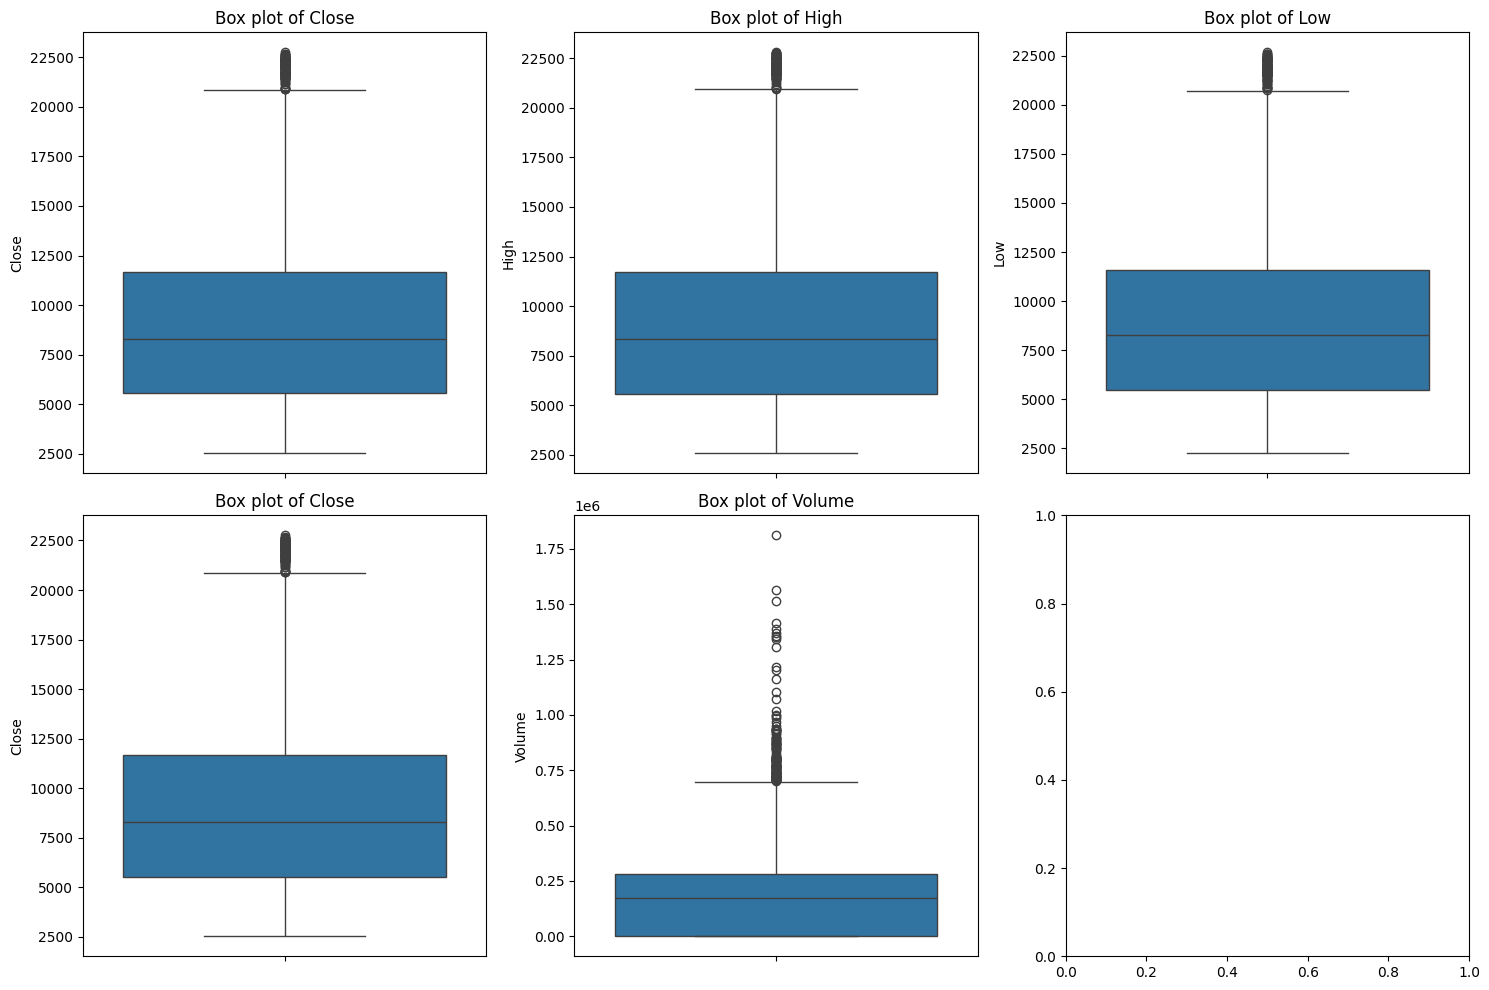

In [156]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

# Plot boxplots for each numerical column
for i, column in enumerate(numerical_columns.columns):
    sns.boxplot(y=data[column], ax=axes[i])
    axes[i].set_title(f'Box plot of {column}')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

Insights:

- There are some **outliers** and **zero value** in `Volume` (Incorrect data)
- It represents the no. of people trading on that particular day. It does not represent the price of stocks.
- Technical Indicators like `Force Index` dependent upon Volume.
- For volume = 0, `Force Index` will be 0. 
- Outliers Need to be handled if model performs poorly on the data.

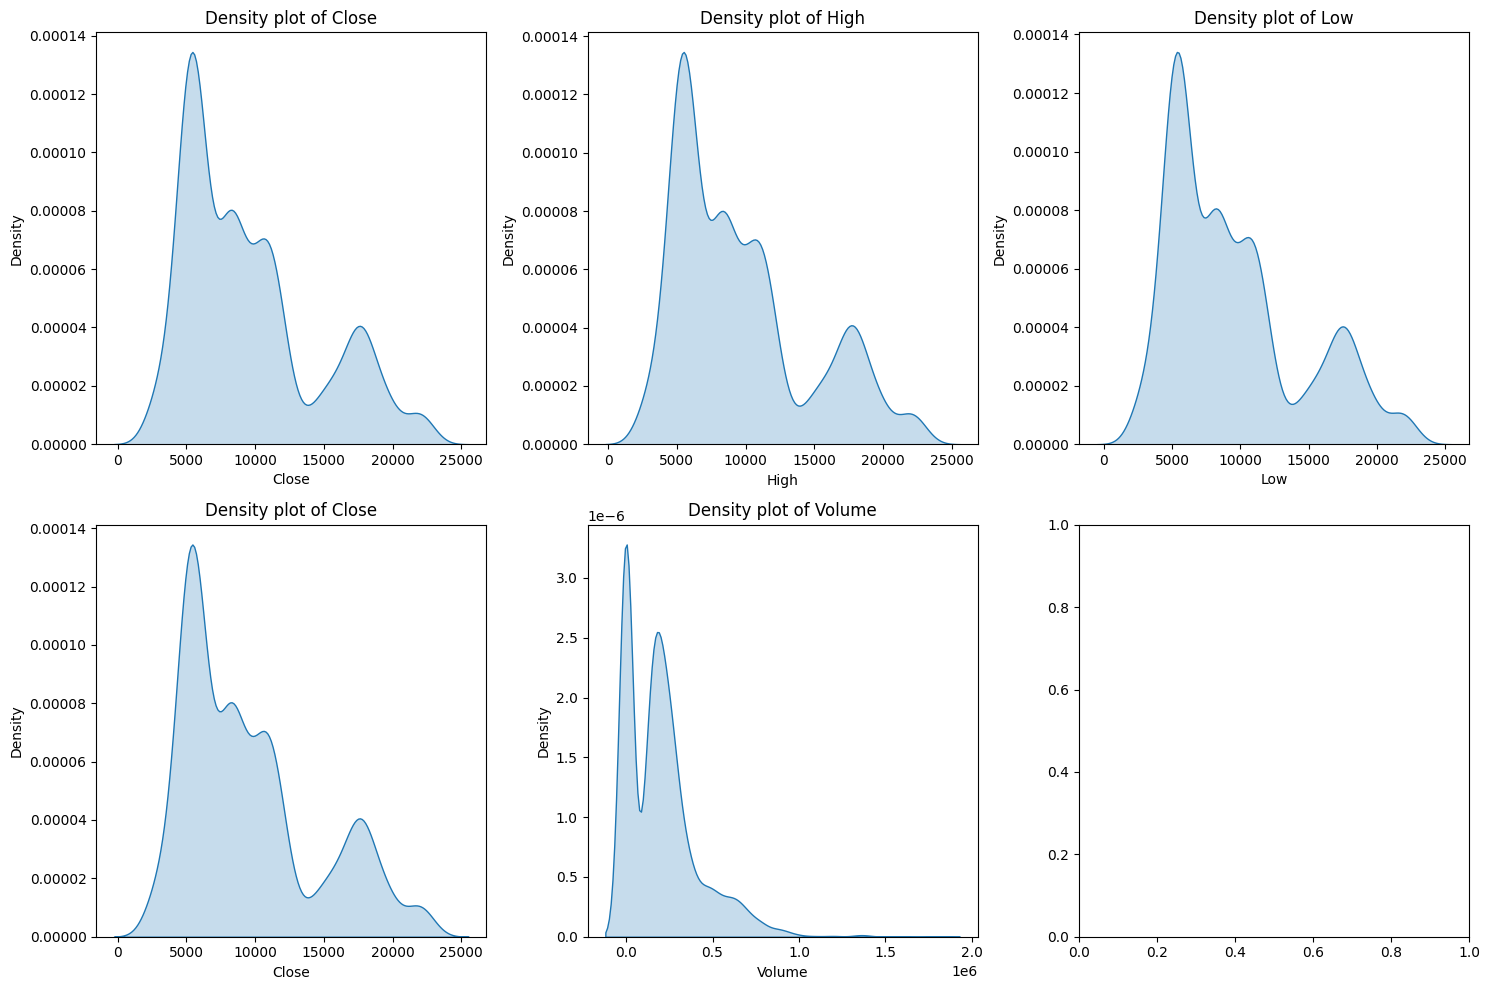

In [157]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

# Plot density plots for each numerical column
for i, column in enumerate(numerical_columns.columns):
    sns.kdeplot(data[column], ax=axes[i], fill=True)
    axes[i].set_title(f'Density plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')


plt.tight_layout()
plt.show()

will compare this distribution **post outlier treatment.**

**NOTE** - whatever preprocessing is done, it should not effect the original data distribution of the columns.

## 4.2 Multiveriate analysis

Basic plot of Closing Price 

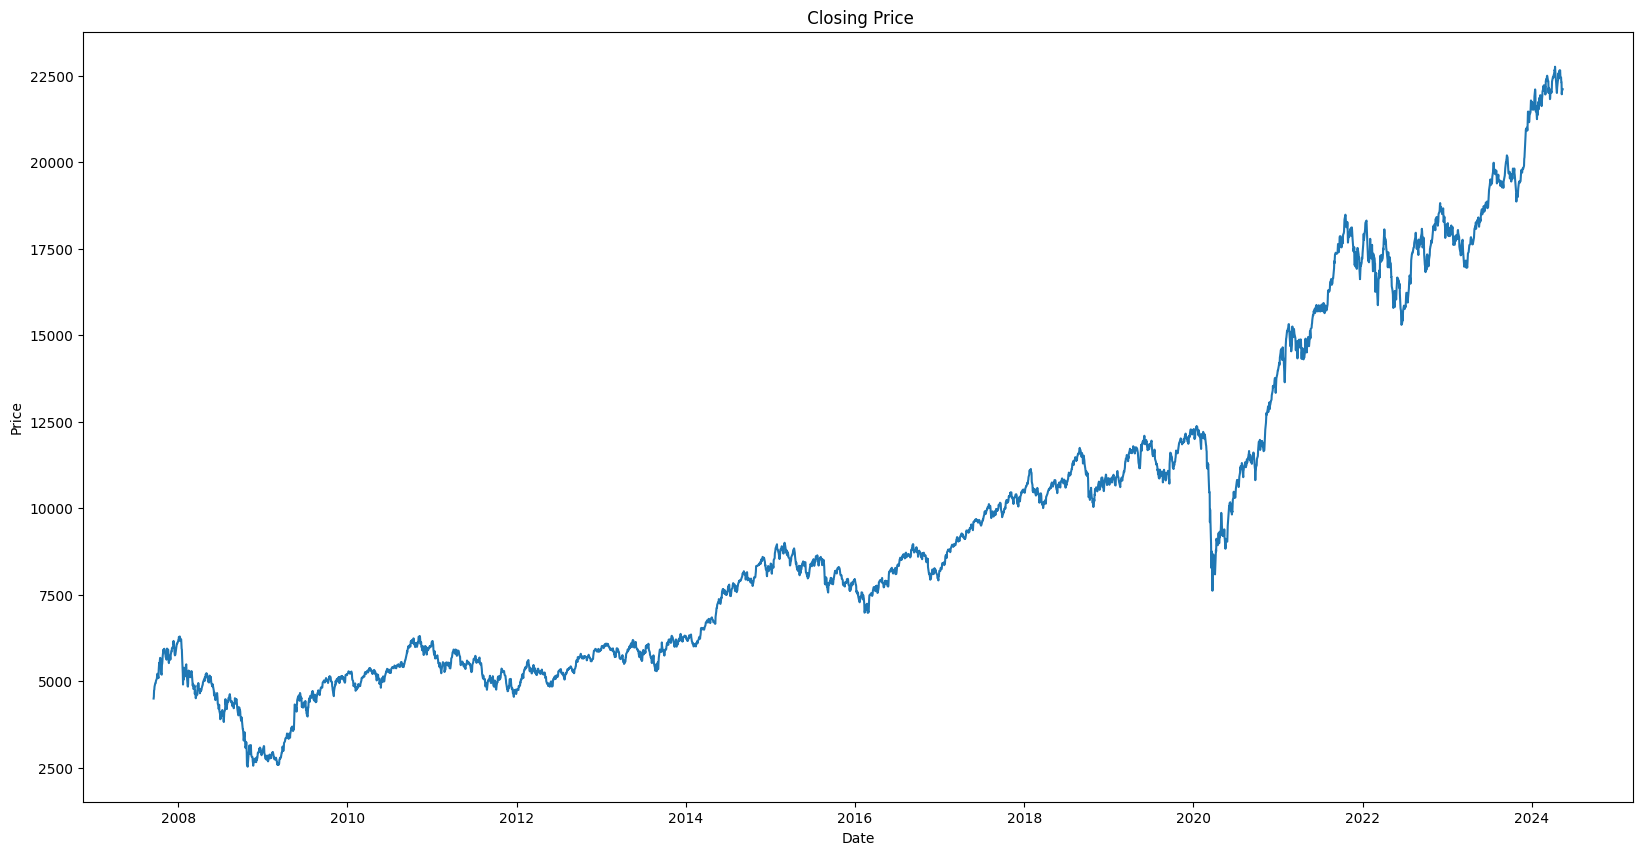

In [158]:
plt.figure(figsize=(20,10))
length=len(data)
plt.plot(data['Close'])
plt.xlabel("Date")
plt.ylabel("Price")
plt.title(' Closing Price')
# plt.xticks(np.arange(0,length, int(length/6)), data['Date'][0:length:int(length/6)])
plt.show()

Plot of volume of stock traded over time

Text(0.5, 1.0, 'Cummulative Volume of Stock traded')

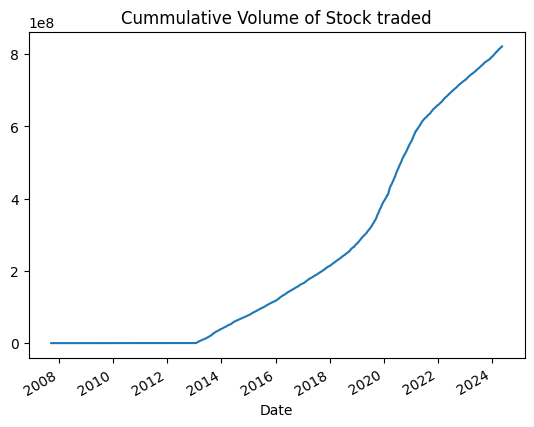

In [159]:
dr = data['Volume'].cumsum()
dr.plot()
plt.title('Cummulative Volume of Stock traded')

Correlation of Closeing price for f=date y(t) and y(t+5)

Text(0.5, 1.0, ' Correlation plot for date y(t) and y(t+5)')

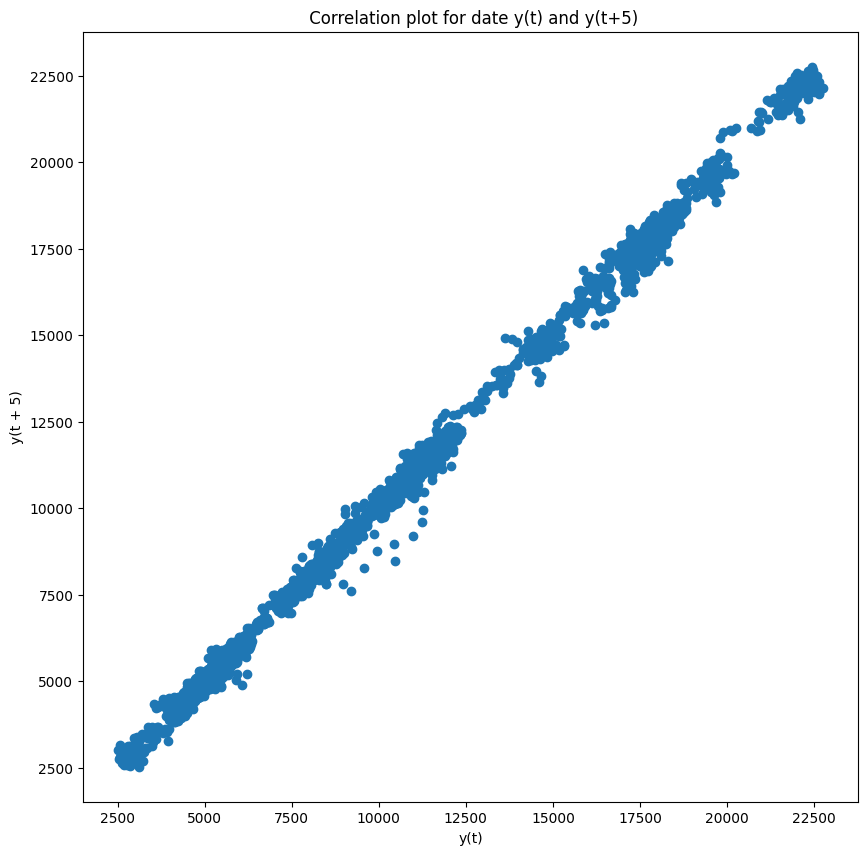

In [160]:
plt.figure(figsize=(10,10))
lag_plot(data['Close'], lag=5)
plt.title(' Correlation plot for date y(t) and y(t+5)')

Plot of stock price wrt date and segregation of train and test data

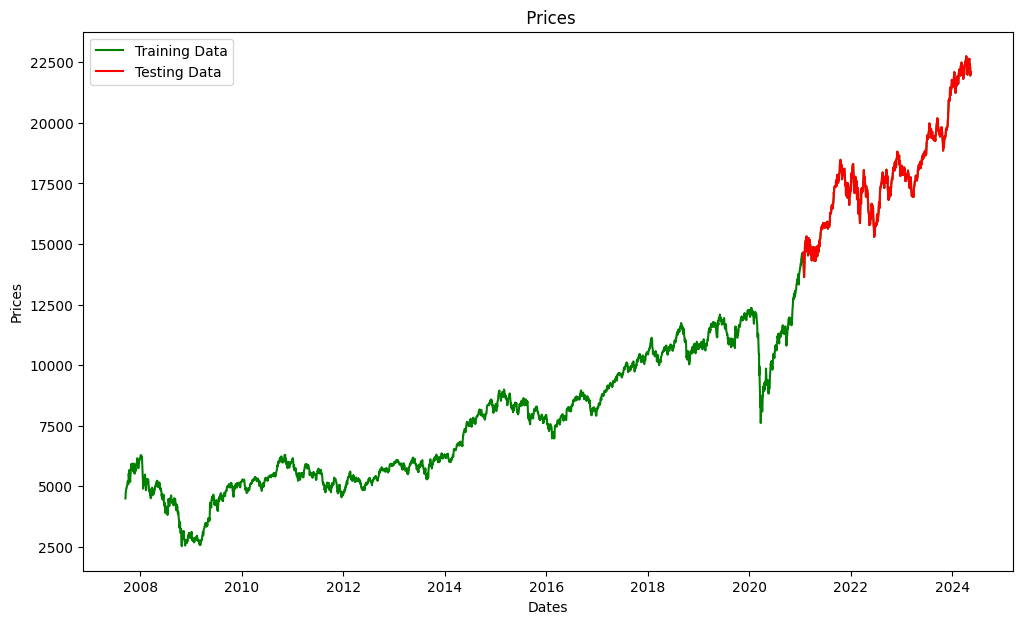

In [161]:
train_data, test_data = data[0:int(len(data)*0.8)], data[int(len(data)*0.8):]
plt.figure(figsize=(12,7))
plt.title(' Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(data['Close'], 'green', label='Training Data')
plt.plot(test_data['Close'], 'red', label='Testing Data')
# plt.xticks(np.arange(0,length, quart), data['Date'][0:length:quart])
plt.legend()

correlation matrix

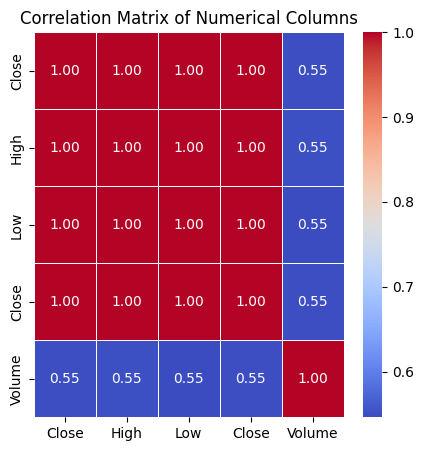

In [162]:
import seaborn as sns

correlation_matrix = numerical_columns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


## 4.3 Discarding warm-up periods

Discarding initial subsections of the dataset, often referred to as **burn-in** or **warm-up** periods, is a common practice for several reasons:

1. **Data Stationarity**: Financial data often exhibits non-stationary behavior, meaning that statistical properties such as mean, variance, and autocorrelation can change over time. By discarding initial data, we aim to stabilize the statistical properties and make the data more stationary.

2. **Model Initialization**: Many machine learning models require some initial data to learn patterns and establish internal parameters. By discarding the initial data, we allow the model to initialize properly and reach a stable state before making predictions.

3. **Avoiding Overfitting**: Models may overfit the training data if they are given too much data, especially if the data includes noisy or irrelevant information. By discarding initial data, we reduce the risk of overfitting by providing the model with a cleaner and more relevant subset of data.

4. **Adapting to Market Dynamics**: Financial markets are dynamic and can undergo structural changes over time due to various factors such as economic events, policy changes, or technological advancements. By discarding initial data, you allow the model to adapt to the current market dynamics rather than being influenced by outdated patterns.

In [163]:
data[data['Volume'] == 0].shape[0]

1331

In [164]:
data = data[data['Volume']>0]

- Checking the data distribution post discarding warmup values.
- The data distribution should not be effected by preprocessing.

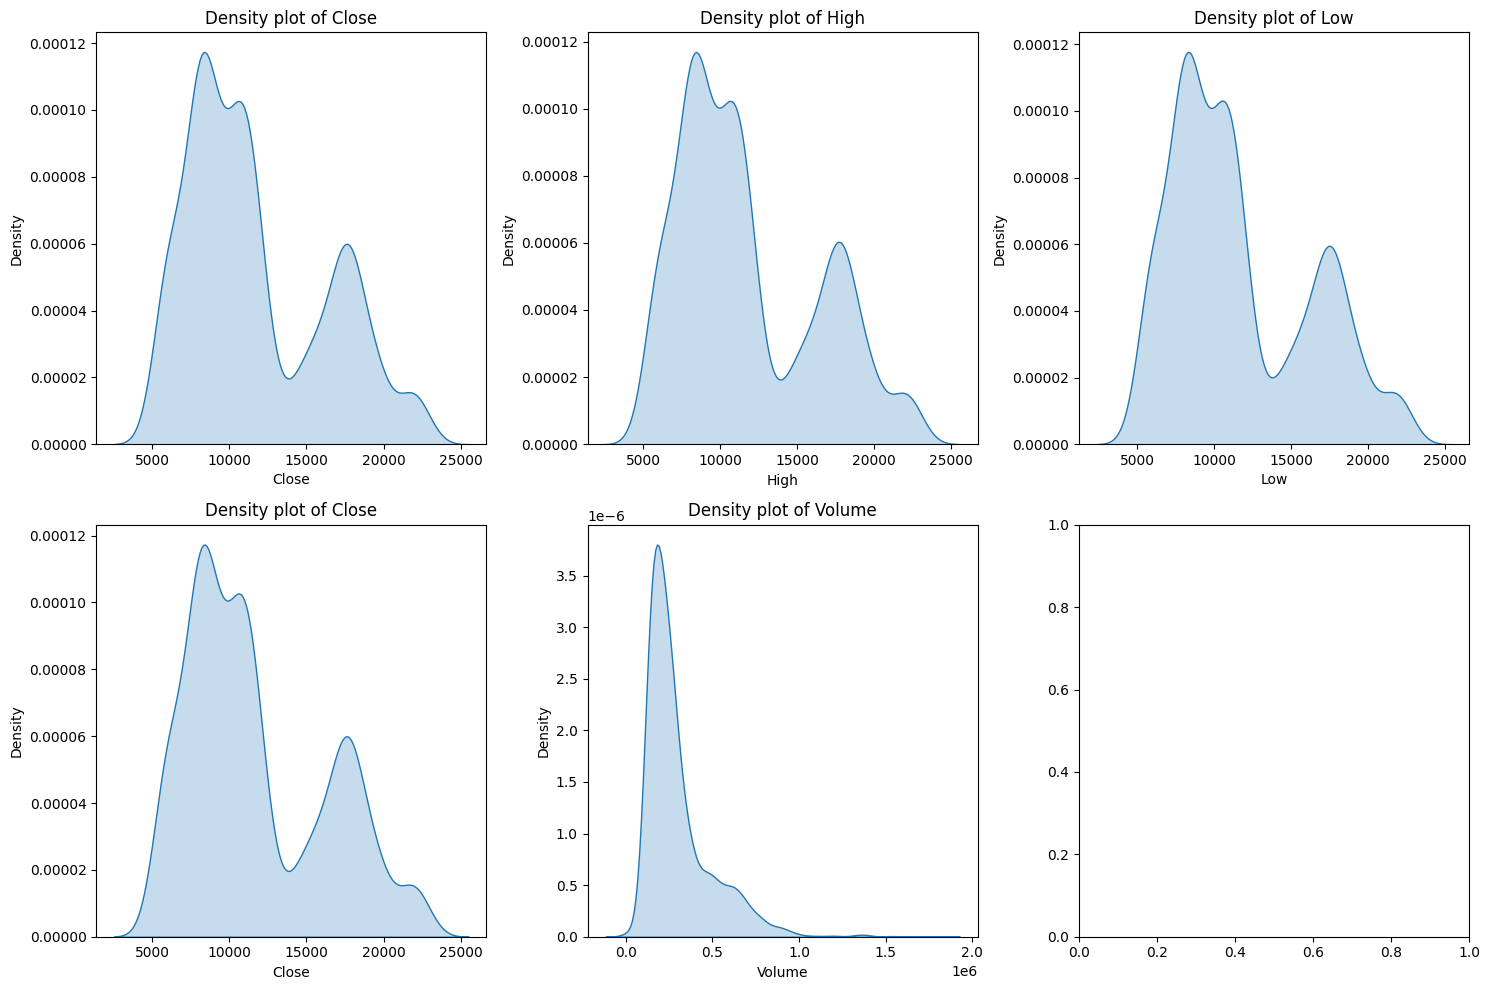

In [165]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

numerical_columns = data[['Close', 'High', 'Low', 'Close', 'Volume']]

# Plot density plots for each numerical column
for i, column in enumerate(numerical_columns.columns):
    sns.kdeplot(data[column], ax=axes[i], fill=True)
    axes[i].set_title(f'Density plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')


plt.tight_layout()
plt.show()

## 4.4 Feature Engineering

adding **technical indicators** as features

`Force Index (FI)`:
- **Definition:** The Force Index measures the strength of bulls (buyers) or bears (sellers) in the market by combining price movement and volume. It is calculated by multiplying the daily price change by the volume.
- **Explanation:** A positive Force Index indicates that bulls are stronger, suggesting upward price momentum, while a negative Force Index suggests that bears are stronger, indicating downward price momentum.

`Williams %R`:
- **Definition:** The Williams %R, also known as the Williams Percent Range, is a momentum oscillator that measures overbought or oversold conditions in the market. It compares the current closing price to the high-low range over a specified period, typically 14 days.
- **Explanation:** Williams %R values range from -100 to 0, with readings above -20 considered overbought and readings below -80 considered oversold. Traders often use Williams %R to identify potential reversal points in the market.

`Relative Strength Index (RSI):`
- **Definition:** The Relative Strength Index is a momentum oscillator that measures the speed and change of price movements. It compares the magnitude of recent gains to recent losses over a specified period, typically 14 days.
- **Explanation:** RSI values range from 0 to 100, with readings above 70 considered overbought and readings below 30 considered oversold. Traders use RSI to identify potential trend reversals or to confirm the strength of a current trend.

`Rate of Change (ROC):`
- **Definition:** The Rate of Change measures the percentage change in price over a specified period, typically 12 or 14 days. It compares the current price to the price n days ago.
- **Explanation:** A positive ROC indicates upward price momentum, while a negative ROC indicates downward price momentum. Traders use ROC to gauge the speed and direction of price movements and to identify potential buying or selling opportunities.

`Average True Range (ATR):`
- **Definition:** The Average True Range measures market volatility by calculating the average range between the high and low prices over a specified period, typically 14 days.
- **Explanation:** A higher ATR value suggests higher volatility, indicating larger price movements, while a lower ATR value suggests lower volatility and smaller price movements. Traders use ATR to set stop-loss levels and to adjust their trading strategies based on market volatility.

In [166]:
data['Force Index'] = ta.volume.ForceIndexIndicator(data['Close'], data['Volume']).force_index()
data['Williams R'] = ta.momentum.WilliamsRIndicator(data['High'], data['Low'], data['Close']).williams_r()
data['RSI'] = ta.momentum.RSIIndicator(data['Close']).rsi()
data['ROC'] = ta.momentum.ROCIndicator(data['Close']).roc()
data['ATR'] = ta.volatility.AverageTrueRange(data['High'], data['Low'], data['Close']).average_true_range()
data.head(20)

C:\Users\Animesh\AppData\Local\Temp\ipykernel_26512\832118352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Force Index'] = ta.volume.ForceIndexIndicator(data['Close'], data['Volume']).force_index()
C:\Users\Animesh\AppData\Local\Temp\ipykernel_26512\832118352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Williams R'] = ta.momentum.WilliamsRIndicator(data['High'], data['Low'], data['Close']).williams_r()
C:\Users\Animesh\AppData\Local\Temp\ipykernel_26512\832118352.py:3: SettingWithC

,Open,High,Low,Close,Volume,Force Index,Williams R,RSI,ROC,ATR
Date,,,,,,,,,,
2013-01-21 00:00:00+05:30,6085.750000,6094.350098,6065.100098,6082.299805,130900,NaN,NaN,NaN,NaN,0.000000
2013-01-22 00:00:00+05:30,6080.149902,6101.299805,6040.500000,6048.500000,129000,NaN,NaN,NaN,NaN,0.000000
2013-01-23 00:00:00+05:30,6052.850098,6069.799805,6021.149902,6054.299805,137000,NaN,NaN,NaN,NaN,0.000000
2013-01-24 00:00:00+05:30,6046.200195,6065.299805,6007.850098,6019.350098,185200,NaN,NaN,NaN,NaN,0.000000
2013-01-25 00:00:00+05:30,6024.500000,6080.549805,6014.450195,6074.649902,147600,NaN,NaN,NaN,NaN,0.000000
2013-01-28 00:00:00+05:30,6082.100098,6088.399902,6061.399902,6074.799805,113100,NaN,NaN,NaN,NaN,0.000000
2013-01-29 00:00:00+05:30,6064.700195,6111.799805,6042.450195,6049.899902,157600,NaN,NaN,NaN,NaN,0.000000
2013-01-30 00:00:00+05:30,6065.000000,6071.950195,6044.149902,6055.750000,124200,NaN,NaN,NaN,NaN,0.000000
2013-01-31 00:00:00+05:30,6045.649902,6058.049805,6025.149902,6034.750000,168500,NaN,NaN,NaN,NaN,0.000000


In [167]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Force Index    13
Williams R     13
RSI            13
ROC            12
ATR             0
dtype: int64

In [168]:
data.dropna(inplace=True)

C:\Users\Animesh\AppData\Local\Temp\ipykernel_26512\1368182302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [169]:
data.isnull().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
Force Index    0
Williams R     0
RSI            0
ROC            0
ATR            0
dtype: int64

### Correlation Matrix

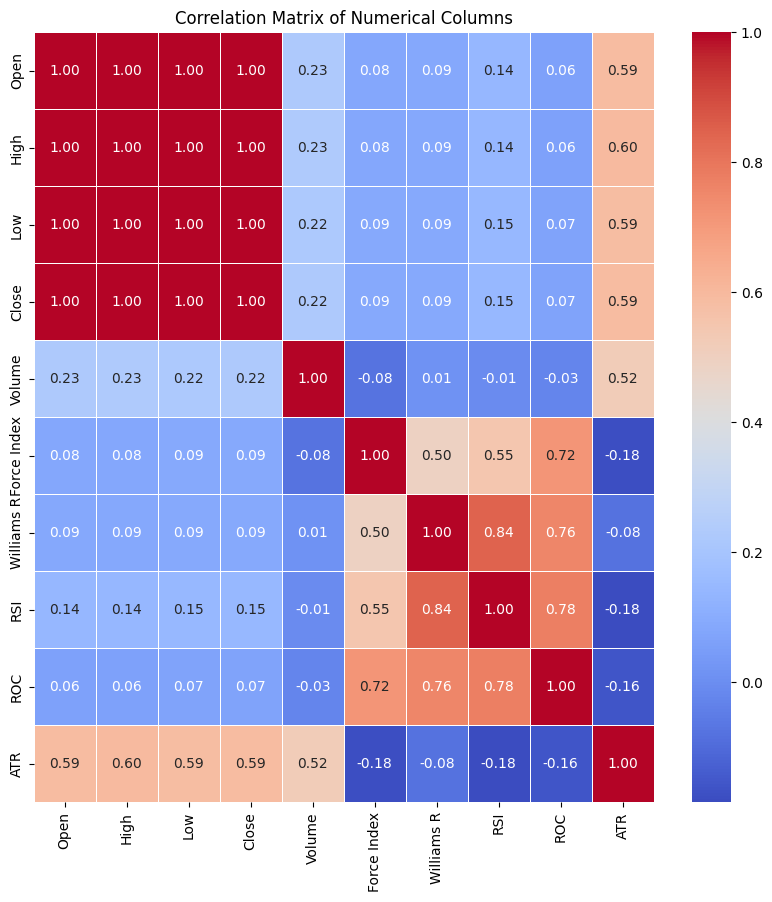

In [170]:
import seaborn as sns

correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


## 4.5 train-test split

In [171]:
train_data, test_data = data[0:int(len(data)*0.8)], data[int(len(data)*0.8):]

In [172]:
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

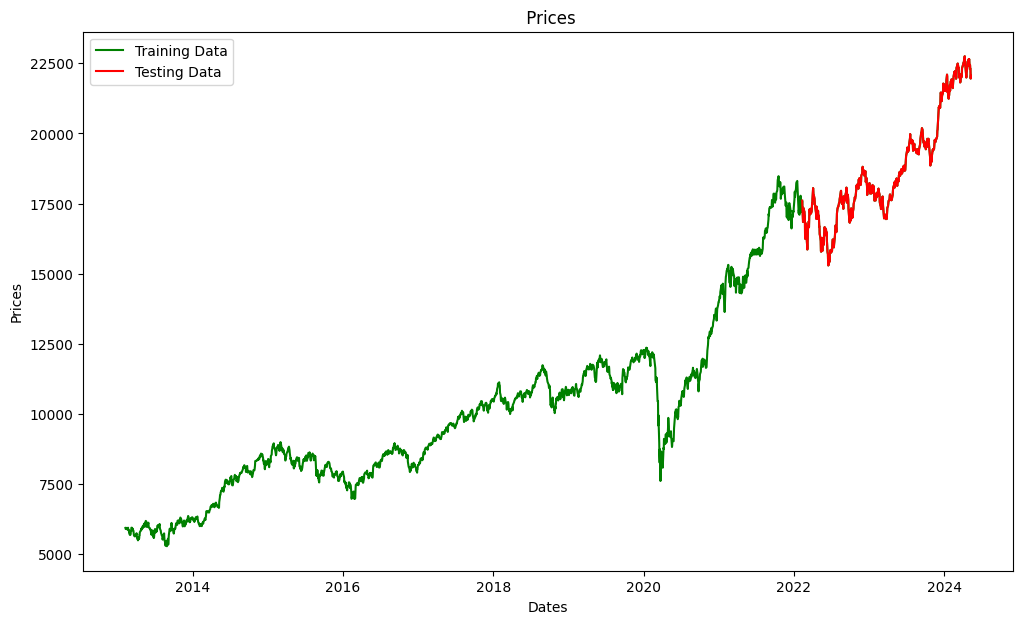

In [173]:
train_data, test_data = data[0:int(len(data)*0.8)], data[int(len(data)*0.8):]
plt.figure(figsize=(12,7))
plt.title(' Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(data['Close'], 'green', label='Training Data')
plt.plot(test_data['Close'], 'red', label='Testing Data')
# plt.xticks(np.arange(0,length, quart), data['Date'][0:length:quart])
plt.legend()

# 6. Model Building and validation

## 6.1 **ARIMA** (Auto Regressive Integrated Moving Average)

Prediction using ARIMA 

In [174]:
history = [x for x in train_ar]
predictions = []

for t in range(len(test_ar)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)

performance evauaion

In [175]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [176]:
error = sqrt(mean_squared_error(test_ar, predictions))
print('Testing Root Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)
error3 = mean_absolute_percentage_error(test_ar, predictions)
print('MAPE: %.3f' % error3)
r2 = r2_score(test_ar, predictions)
print('R2: %.3f' % r2)


Testing Root Mean Squared Error: 155.869
Symmetric mean absolute percentage error: 0.647
MAPE: 0.006
R2: 0.993


performance Vizualisation

C:\Users\Animesh\AppData\Local\Temp\ipykernel_26512\2394632985.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(data['Close'], 'green', color='green', label='Training Data')


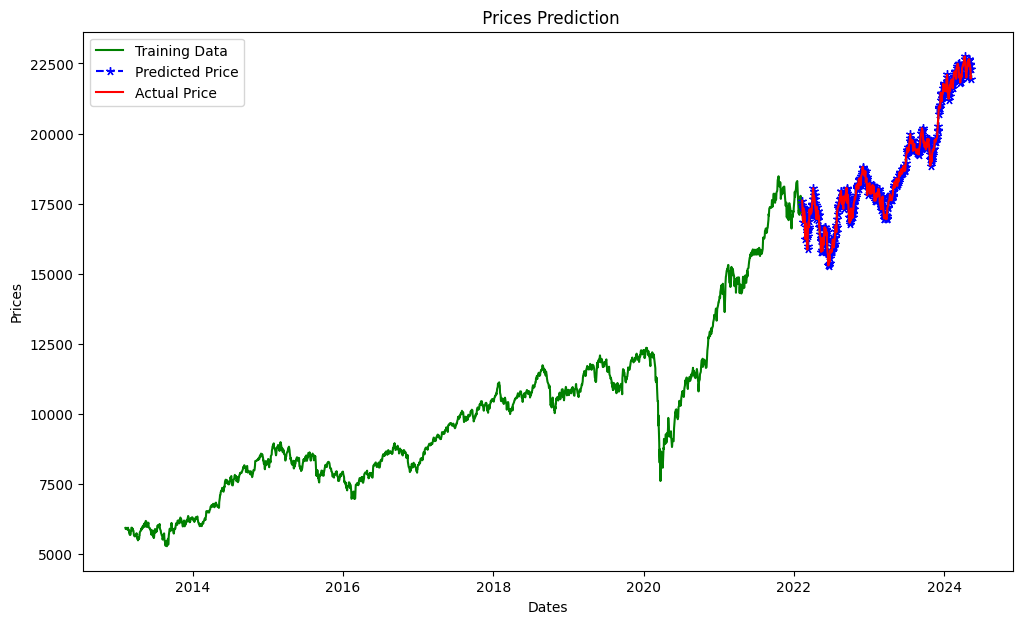

In [177]:
plt.figure(figsize=(12,7))
plt.plot(data['Close'], 'green', color='green', label='Training Data')
plt.plot(test_data.index, predictions, color='blue', marker=(5,2), linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title(' Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
# plt.xticks(np.arange(0,length, quart), data['Date'][0:length:quart])
plt.legend()

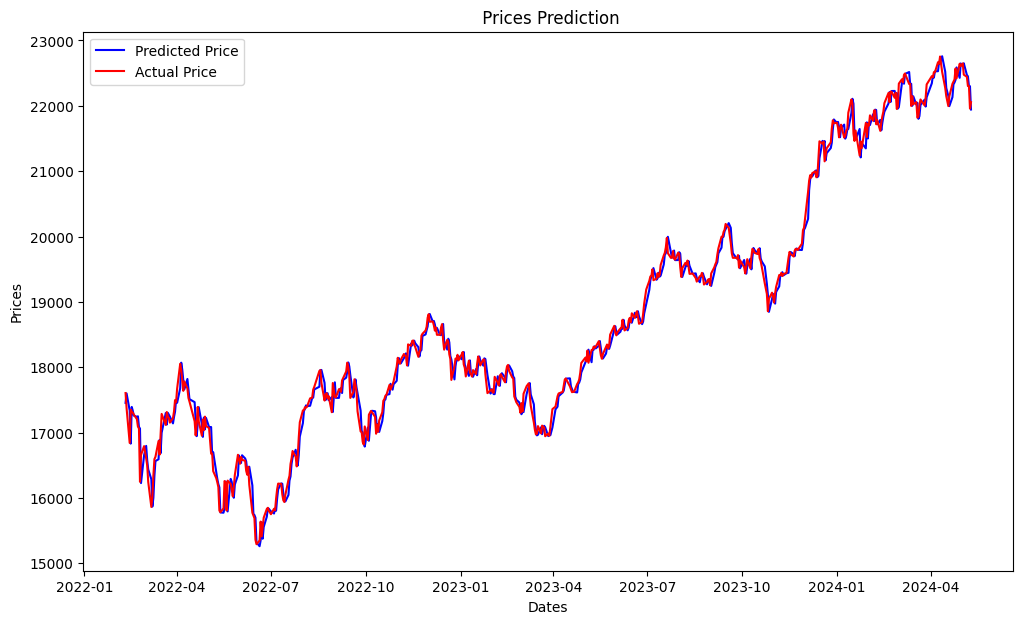

In [178]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='blue', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title(' Prices Prediction')
# plt.xticks(np.arange(int(0.8*(length)),(length-1), int(quart/5)), df['Date'][int(0.8*(length)):(length-1):int(quart/5)])
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

## 6.2 **LSTM** (Long Short Term Memory)

prediction using LSTM

In [179]:

train_data, test_data = data[0:int(len(data)*0.8)], data[int(len(data)*0.8):]

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data[['Close']])
test_scaled = scaler.transform(test_data[['Close']])

# Function to create LSTM dataset
def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

# Reshape into X=t,t+1,t+2,.. and Y=t+3
time_step = 100
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)




Epoch 1/100


c:\Users\Animesh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0812 - val_loss: 0.0043
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0015 - val_loss: 6.4996e-04
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 4.3661e-04 - val_loss: 8.7080e-04
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 3.7688e-04 - val_loss: 0.0010
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 3.7157e-04 - val_loss: 0.0016
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 4.3273e-04 - val_loss: 8.1921e-04
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 3.6695e-04 - val_loss: 8.3330e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 3.5445e-04 - val_loss: 6.9914e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 4.3376e-04 - val_loss: 0.0010
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 4.0988e-04 - val_loss: 0.0011
Epoch 11/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 3.4516e-04 - val_loss: 6.4613e-04
Epoc

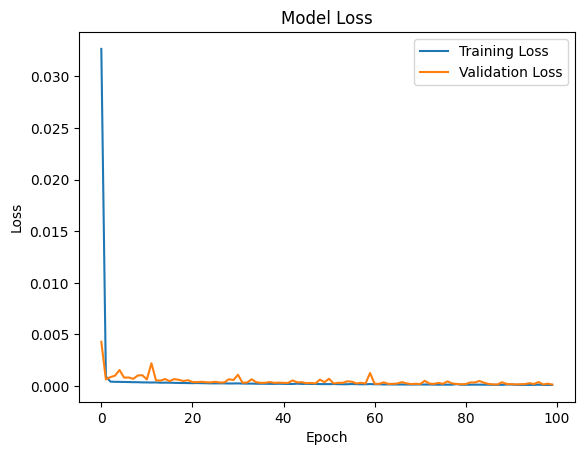

In [180]:
# Plot training loss history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

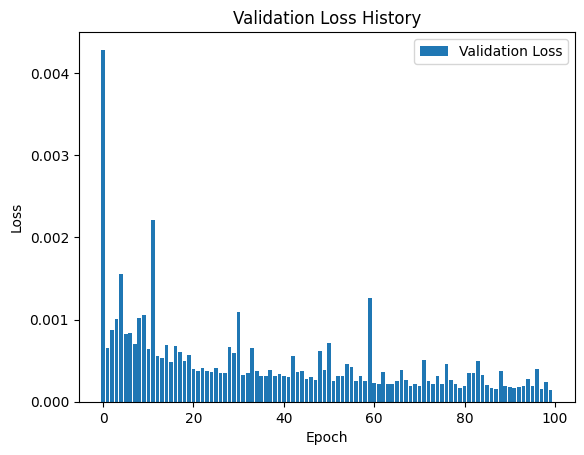

In [181]:
# Plot validation loss history as a bar graph
plt.bar(range(len(history.history['val_loss'])), history.history['val_loss'], label='Validation Loss')
plt.title('Validation Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [182]:
# Find the minimum validation loss
min_val_loss = min(history.history['val_loss'])
print("Minimum Validation Loss:", min_val_loss)
# Find the epoch with minimum validation loss
min_val_loss_epoch = np.argmin(history.history['val_loss']) + 1
print("Epoch with Minimum Validation Loss:", min_val_loss_epoch)


Minimum Validation Loss: 0.00014730831026099622
Epoch with Minimum Validation Loss: 100


performance

In [183]:
error = sqrt(mean_squared_error(test_data['Close'][time_step+1:], test_predict))
print('Testing Root Mean Squared Error: %.3f' % error)
r2 = r2_score(test_data['Close'][time_step+1:], test_predict)
print('R2: %.3f' % r2)
error3 = mean_absolute_percentage_error(test_data['Close'][time_step+1:], test_predict)
print('MAPE: %.3f' % error3)

Testing Root Mean Squared Error: 216.327
R2: 0.985
MAPE: 0.009


vizualisation

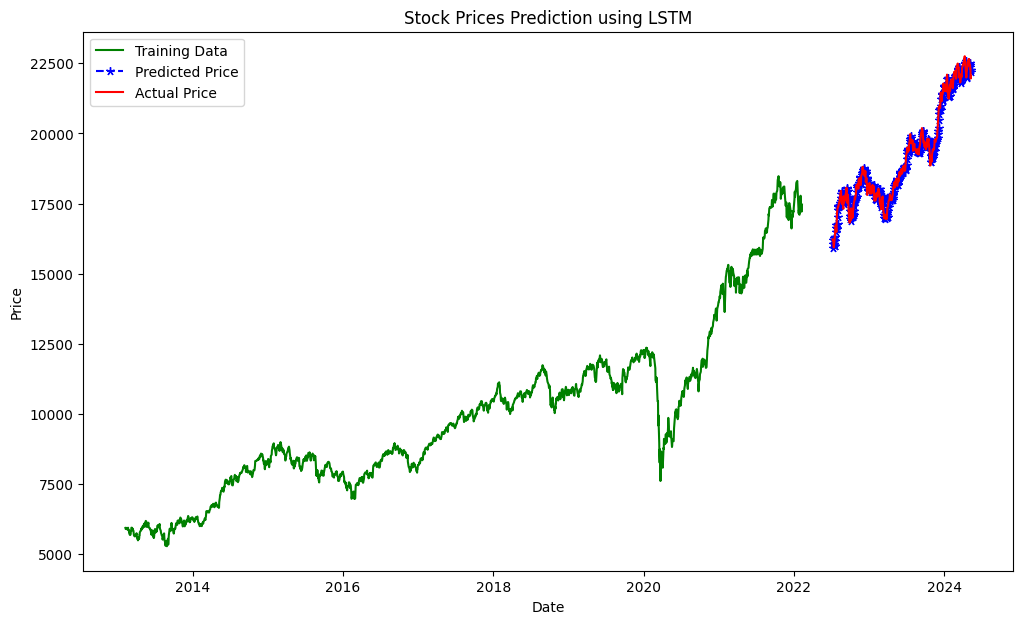

In [184]:

plt.figure(figsize=(12,7))
plt.plot(data.index[:len(train_data)], train_data['Close'], color='green', label='Training Data')
plt.plot(test_data.index[time_step+1:], test_predict, color='blue', marker=(5,2), linestyle='dashed', label='Predicted Price')
plt.plot(test_data.index[time_step+1:], test_data['Close'][time_step+1:], color='red', label='Actual Price')
plt.title('Stock Prices Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
